In [1]:
from ekpy import analysis
import numpy as np
import scipy.integrate as it
from scipy.signal import find_peaks, savgol_filter, peak_widths
import matplotlib.pyplot as plt
from ekpy.analysis.analysisgeotemp import use_analysis_file #note need to make this under __all__

In [6]:
# load the dataset
Data_folder_path = r"C:\Users\geofr\Desktop\Research\Data\FE\PUND\Python"

dset = analysis.load_Dataset(Data_folder_path + '/test')

# print dset, parsable collection of meta data which holds pointers to the real data files
dset

,pulse_width,pulse_delay,voltage_max,num_points,step_size,capacitor_area,thickness,permittivity,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.000001,0.0001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,5.120000e-07,-0.000255,0,0.040201,0.0,0,0,fe_PUND_PV__0.csv
1,0.000001,0.0001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,5.120000e-07,-0.000255,0,0.040201,0.0,0,1,fe_PUND_PV__1.csv
2,0.000001,0.0001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,5.120000e-07,-0.000255,0,0.040201,0.0,0,2,fe_PUND_PV__2.csv
3,0.000100,0.0001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,992,1,1.512000e-06,-0.000750,0,0.040201,0.0,0,3,fe_PUND_PV__3.csv


In [7]:
data2= dset.select_index(3).get_data()

In [8]:
data2.data_keys

['time_v', 'wfm_v', 'time_c', 'wfm_c']

(<Figure size 640x480 with 1 Axes>, <Axes: >)

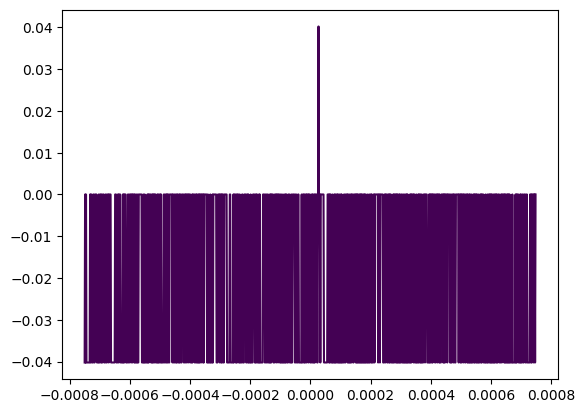

In [9]:
data2.plot('time_v', 'wfm_v')